|Name|Studnet_Id|Date|
|----|----------|----|
|__Pushpendra Sharma__|  407947 |2022-04-03|


<br>



## Background and Introduction  
More than __half of the world (58.4%)__ now uses social media. 4.62 billion people around the world use social media, 424 million new users have come online within the last 12 months. The average daily time spent using social media is 2h 27m [source](https://www.smartinsights.com/social-media-marketing/social-media-strategy/new-global-social-media-research/#:~:text=4.62%20billion%20people%20around%20the,social%20media%20is%202h%2027m.). Businesses target these online users for advertising their product and services.        

Although, social media made it easy for companies to target potential customers, but it also gave opportunities to customers to provide feedbacks. Customer give feedbacks to brands on these media platforms based on their experience. These feedbacks are visible to their friends and family. People use social media to keep in touch with their friends and family, 47.6 percent of internet users list this as one of their top uses of social media [source](https://www.oberlo.ca/statistics/why-do-people-use-social-media#:~:text=According%20to%20a%20recent%20survey,purpose%20of%20social%20media%20is.). It is important to monitor these online feedbacks for improving product, services and finally user experience.           

According to a study by [Nielsen](https://www.nielsen.com/us/en/insights/report/2012/global-trust-in-advertising-and-brand-messages-2/), 92 percent of users trust online content from friends and family above all other forms of brand messaging. Further, 53 percent of millennials have said that user-generated content has influenced their purchasing decision. These data show how important it is to maintain a positive outlook about brand on social media platforms to keep customers happy.             
 
The goal of this study is to analyze online attitude of customers towards a brand. This was done by analyzing sentiment of tweets towards a brand on twitter. 1.5 million tweets in english were used to understand the sentiment behind a tweet. Analyzing each and every tweet manually is next to impossible because of the sheer amount of labour cost involved. Data science techniques can help us in analyzing these many tweets to get a general sentiment about tweet that has a mention about the brand.           

## Objective 

92 percent of users trust online content from friends and family above all other forms of brand messaging. It is important to monitor sentiment towards a brand on social media based on the feedbacks shared by customers with their friends and family. The goal of this study to understand customer sentiment towards a brand based on the tweets on twitter using machine learning and deep learning models.       

## Business value: 

Currently there are tools that can help monitor the public sentiment of a business brand online in real time. Some of these tools are [MonkeyLearn, Meltwater, Rapidminer, Hootsuite, MeaningCloud](https://monkeylearn.com/blog/brand-sentiment/). Buying third party tools can be expensive for a company. This project was taken to inspire organizations to develop these apps within a company to save cost of buying third party apps.      


This project predicts sentiment about a brand in real time which can help companies in in understanding customer behavior, early crisis detection, campaign performance analysis and competitive analysis.             

Any company who uses social media platforms for their marketing strategy can use this app to monitor public sentiment towards their brand over time.          

The next steps for this project to refine the modelling process and automating the whole process for production level deployment.          


<br>

## Design of Study          

To analyze sentiment about a brand, tweets that contain brand name were scrapped from twitter. The sentiment for these tweets were predicted to determine customer attitude towards a brand. If sentiment of a tweet is negative, that means people are talking negatively about the given brand and vice versa. The sentiment of tweet was plotted over time to understand what customer feels about the brand over time. Understanding sentiment about a brand over time can help in understanding customer behaviour, early crisis detection, campaign performance analysis and competitive analysis.        

Sentiment of tweet was determined based on the pre-trained machine learning and deep learning models. These models were trained on 1.4 million labeled tweets.The following steps were taken to understand sentiment of tweets.        

1. Data collection: This section describes data collection process. It includes the information about the data collected for model training and testing. The information for this section is provided in `1_Data_Cleaning_EDA` and `5_Model_Testing` notebooks.          
2. Data cleaning, exploratory data analysis (EDA), and feature engineering: This section describes different steps taken in data cleaning and EDA. The information for this section can be found in the `1_Data_Cleaning_EDA` notebook.
3. Modelling: This section describes different modelling approaches taken to predict sentiment of tweets. The information on this section can be found in the notebooks `2_Modelling`, `3_Advanced_Modelling`, and `4_Neural_Network_Modelling`. 
4. Model Testing: This section describes the process of testing developed models on the data scrapped from twitter. The information on this section can be found in the the notebook `5_Model_Testing` 
5. Model deployment: This section describes the steps taken to develop an online app that scrapes data from twitter for a brand and predicts sentiment about it. The information on this section can found in `6_Streamlit_App`. 



## Notebook 1:   `1_Data_Cleaning_EDA`

This notebook contains information about process of data collection for modelling. Different steps taken for data cleaning, and EDA are also described in this notebook. Following is the table of contents for this notebook. 

<br>

### Table of Contents 

<br>   

1. [The Dataset](#dataset)            
    1.1 [Data Dictionary](#dictionary)                  
2. [Data Cleaning and EDA](#EDA)        
    2.1 [Some insights from initial data exploration](#insight)    
    2.2 [Exploring column `Ids`](#id)      
    2.3 [Exploring column `flag`](#flag)         
    2.4 [Exploring column `target`](#target)          
    2.5 [Exploring column `date`](#date)
    2.6 [Exploring column `user`](#user) 
    2.6 [Exploring column `text`](#text)               
3. [Conclusion](#conclusion)       
    

Import required packages

In [28]:
#import required libraries
import numpy as np
import pandas as pd

#text processing 
import re


#plotting 
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import matplotlib.ticker as mtick


## The Dataset <br> <a name="dataset"></a>

This is the sentiment140 dataset that was extracted using twitter's API by [Go et al. (2009)](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf). More information on the API can be found [here](http://help.sentiment140.com/for-students).<br>  


This dataset contains 1,600,000 tweets for multiple user in the year 2009. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) based on emoticons in the tweets. The authors have annotated a tweet if it contains a tweet with positive emoticon like, :) else the tweet was annotated as negative if it contains a negative emoticon like :(. The tweets were scrapped from twitter using keyword in twitter's API. These tweets will be used to train machine learning and deep learning models to predict sentiment about a brand. <br>  


A tweet was considered as neutral if it could ever appear as a front page newspaper headline or as a
sentence in Wikipedia. Different emoticons used for annotation are given in Table 1. For more information on target annotation for dataset please follow [this article](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf).<br>    


Table 1. Emoticons used for annotation<br>   

| Emoticons mapped to :)  | Emoticons mapped to :(  |
|---|---|
| :-)  |  :-( |   
| : )  |  : ( |  
| :D  |   |   
| =)  |   |  
<br>   

These tweets were scrapped for 3 months between the the time 2009-04-06 22:19:45 and 2009-06-25 10:28:31. The tweets were scrapped using the twitter's API. We can use twitter's API to scrape data if needed. For this study, twitter's API was used to scrape data to test developed models. 

This study uses data from twitter only, data from other other social websites such as facebook, instagram can help us in predicting the public sentiment across different customer segments. This is because some people prefer one kind of social media website over other. 

The data contains messy tweets, so text preprocessing is required before doing any modelling. 


One thing to note twitter's API with basic account allows you to scrape only limited amount of data. For this study, only 250 tweets from last 7 days. It would have been better to scrape more data to understand brand sentiment. This could have been done in two ways - buy the premium API account or get the API account for academic research. 

### Data Dictionary<br> <a name="dictionary"></a>  

- ids - ID of the tweet  
- date - Date on which tweet was posted
- flag  - The query (lyx). If there is no query, then this value is NO_QUERY. 
- user - User who posted the tweet
- text - Message in the tweet
- target - Sentiment of the tweet


In [3]:
df = pd.read_csv('../data/training_data.csv', encoding="ISO-8859-1",
                 names=["target", "ids", "date", "flag", "user", "text"])

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data Cleaning and EDA  <a name="EDA"></a>  

- Handle null values
- Handle duplicated rows and columns 
- Handle different data types
- Decide which columns/rows to keep
- Preprocess text data
- Explore each of the columns to discover patterns
- Export cleaned data for transformation and modelling 

In [5]:
#reorder column names
df = df[['ids', 'flag', 'date', 'user', 'text', 'target']]
df.head()

,ids,flag,date,user,text,target
0,1467810369,NO_QUERY,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,NO_QUERY,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,NO_QUERY,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,NO_QUERY,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,NO_QUERY,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [6]:
# dimension of data 
df.shape

(1600000, 6)

Our data has 1.6 million rows and 6 columns. The information about each of the columns are provided in data dictionary. 

In [7]:
#check data types and dimensions for columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ids     1600000 non-null  int64 
 1   flag    1600000 non-null  object
 2   date    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
 5   target  1600000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
#check if there are null values in data
df.isna().sum().sum()

0

In [9]:
#check for duplicate rows 
df.duplicated().sum()

0

### Some insights from initial data exploration<br> <a name="insight"></a>   

- There are 1.6 million rows and 6 columns in data. 
- Two columns, ids and target are integers while other columns are object datatype. We know that we have three categories in target (positive, negative and neutral), therefore, datatype for this column should be categorical.   
- For the object type columns, the data type od date column should be timestamp and other columns should be strings. 
- There are no missing and null values in any of the columns of data. 
- There are no duplicate rows and columns in the data   

In [10]:
#check number of unique values for each column
def nunique_values(df):
    for col in df:
        print(f'Unique values in {col}: {df[col].nunique()}, {100*df[col].nunique()/df.shape[0]}%')
nunique_values(df)

Unique values in ids: 1598315, 99.8946875%
Unique values in flag: 1, 6.25e-05%
Unique values in date: 774363, 48.3976875%
Unique values in user: 659775, 41.2359375%
Unique values in text: 1581466, 98.841625%
Unique values in target: 2, 0.000125%


The number of unique values for ids are 99.9% of total data, that is there are 1685 duplicate ids in our data. Every tweet should only have one id. Let's explore further to understand what's going on in our dataset. For this let's see the data where ids are duplicated.   

In [11]:
df[df['ids'].duplicated(keep=False)].sort_values(by='ids')

,ids,flag,date,user,text,target
213,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,0
800261,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,4
275,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,0
800300,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,4
989,1468053611,NO_QUERY,Mon Apr 06 23:28:09 PDT 2009,mariejamora,@hellobebe I also send some updates in plurk b...,0
...,...,...,...,...,...,...
524290,2193428118,NO_QUERY,Tue Jun 16 08:26:44 PDT 2009,bubbles00,"finally finished typing!!!! Woohoooo , still ...",0
1599440,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",4
524345,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",0
524688,2193576442,NO_QUERY,Tue Jun 16 08:38:45 PDT 2009,emma_b_xox,Had an injection today. Not fun the rrst of t...,0


It seems some of the tweets are annotated as both positive and negative. To see if all the duplicated rows have been annotated both positive and negative, let's first find the total number of duplicate rows in our data (excluding target column) . 

In [12]:
df[df.loc[:, ['ids', 'flag', 'date', 'user', 'text']].duplicated()].sort_values(by='ids')

,ids,flag,date,user,text,target
800261,1467863684,NO_QUERY,Mon Apr 06 22:33:35 PDT 2009,DjGundam,Awwh babs... you look so sad underneith that s...,4
800300,1467880442,NO_QUERY,Mon Apr 06 22:38:04 PDT 2009,iCalvin,Haven't tweeted nearly all day Posted my webs...,4
801280,1468053611,NO_QUERY,Mon Apr 06 23:28:09 PDT 2009,mariejamora,@hellobebe I also send some updates in plurk b...,4
801573,1468100580,NO_QUERY,Mon Apr 06 23:42:57 PDT 2009,cristygarza,good night swetdreamss to everyonee and jare...,4
801650,1468115720,NO_QUERY,Mon Apr 06 23:48:00 PDT 2009,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss ...,4
...,...,...,...,...,...,...
1598780,2193278017,NO_QUERY,Tue Jun 16 08:14:22 PDT 2009,janiecwales,oh dear HH is back please twitter do somethi...,4
1599298,2193403830,NO_QUERY,Tue Jun 16 08:24:44 PDT 2009,lauren__x33,english exam went okay revising for fre...,4
1599385,2193428118,NO_QUERY,Tue Jun 16 08:26:44 PDT 2009,bubbles00,"finally finished typing!!!! Woohoooo , still ...",4
1599440,2193451289,NO_QUERY,Tue Jun 16 08:28:37 PDT 2009,faiznurdavid,"@fanafatin see, @misschimichanga tweet u to jo...",4


There are 1685 duplicate tweets, equal to the total number of duplicate ids. This implies that the dulpicate ids and rows are due to annotation of certain tweets both as positive and negative. Let's try to find why these tweets were annotated twice. 

In [13]:
df_duplicated = df[df.loc[:, ['ids', 'flag', 'date', 'user', 'text']].duplicated(keep=False)].sort_values(by='ids').copy()

In [14]:
df_duplicated[['text', 'target']]

,text,target
213,Awwh babs... you look so sad underneith that s...,0
800261,Awwh babs... you look so sad underneith that s...,4
275,Haven't tweeted nearly all day Posted my webs...,0
800300,Haven't tweeted nearly all day Posted my webs...,4
989,@hellobebe I also send some updates in plurk b...,0
...,...,...
524290,"finally finished typing!!!! Woohoooo , still ...",0
1599440,"@fanafatin see, @misschimichanga tweet u to jo...",4
524345,"@fanafatin see, @misschimichanga tweet u to jo...",0
524688,Had an injection today. Not fun the rrst of t...,0


A visual inspection of duplicated rows showed that all the tweets in these rows generally carry a negative sentiment. Also looking at the pairs of duplicate tweets, the tweet with lower index always has a negative sentiment. This may happen if the text in tweet carry negative sentiment but the user used a smiley with a positive sentiment. Here I am dropping all the duplicate tweets with positive sentiments. 

In [15]:
#get the index of duplicated rows where target value is 0
duplicated_index = df_duplicated[df_duplicated['target'] == 0].index

In [16]:
df_clean = df.drop(index=duplicated_index).copy()

In [17]:
#sanity check to see if the operation was performed 
df_clean.shape[0] + len(duplicated_index)

1600000

In [18]:
#check number of unique values for each of the columns in cleaned dataframe 
nunique_values(df_clean)

Unique values in ids: 1598315, 100.0%
Unique values in flag: 1, 6.256588970259305e-05%
Unique values in date: 774363, 48.448710047769055%
Unique values in user: 659775, 41.27940987852833%
Unique values in text: 1581466, 98.94582732440101%
Unique values in target: 2, 0.0001251317794051861%


- We can see that the total number of unique values for ids and total number of rows in the data are same. This shows that each tweet has a unique id in our cleaned data. 
- There is just one unique value for the flag columns that shows that no specific queries were made to reterieve data.   
- The date column has 48.4% unique values. This implies multiple tweets were scraped from twitter's API at a single moment. 
- Further, there are 41.3% unique users as compare to total number of tweets. This implies that there are users who twitted more than once.    
- Finally, there are 99% unique tweets as compare to total number of tweets. This shows that multiple users can tweet same thing for instance, some of the tweets such as 'goodmorning' were tweeted by more than one users. 

__Let's explore distribution for each column in our data__

### Exploring column `Ids` <a name="id"></a>

In [19]:
df_clean['ids'].describe()

count    1.598315e+06
mean     1.998872e+09
std      1.935913e+08
min      1.467810e+09
25%      1.956927e+09
50%      2.002114e+09
75%      2.177094e+09
max      2.329206e+09
Name: ids, dtype: float64

The id repersents a unique identifier for each of the tweet. It keeps track for each of the tweet in our data. The total number values, unique values and total number of tweets in the dataset are equal. The value of Id starts at `1.467810e+09` and ends at `2.3292063+09`. 

### Exploring column `flag` <a name="flag"></a>

The data type for this column is `string`. This column repersents the query for which the sentiment was analyzed. The follwoing table 2 provides some examples for the defination of the query.   
<br>  

|Sentiment    | flag    | Tweet    |
|----|-----|-----|
|Positive    |jquery     |dcostalis: Jquery is my new best friend.     |
|Neutral    |San Francisco     |schuyler: just landed at San Francisco     |
|Negative    |exam     |jvici0us: History exam studying ugh.     |

<br>  

From the above examples we can see that the falg is a word or combination of words for which the sentiment was determined.   

<br>

From the code below we can see that there is just one unique value, `NO_QUERY` in flag column. `NO_QUERY` represents that the target value, that is sentiment is not for a specific word rather it represents sentiment of the whole tweet. We can remove this column from our data set as it doesn't add any additional information to setiment for a tweet. 

In [20]:
print(df_clean['flag'].value_counts())
print(df_clean['flag'].nunique())

NO_QUERY    1598315
Name: flag, dtype: int64
1


In [21]:
df_clean.drop(columns='flag', inplace=True)
df_clean.head()

,ids,date,user,text,target
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


### Exploring column `target` <a name="target"></a>

In [22]:
df_clean['target'].unique()

array([0, 4], dtype=int64)

The column target has only two values 0 and 4. 0 represents negative sentiment while 4 represents positive sentiment. There are no tweets in this data with neutral sentiments. I am replacing 4 with 1 to compy it with the convetion for naming a binary target with 0 and 1.   

In [23]:
df_clean['target'].replace(to_replace=4, value=1, inplace=True)

In [24]:
#sanity check
df_clean['target'].unique()

array([0, 1], dtype=int64)

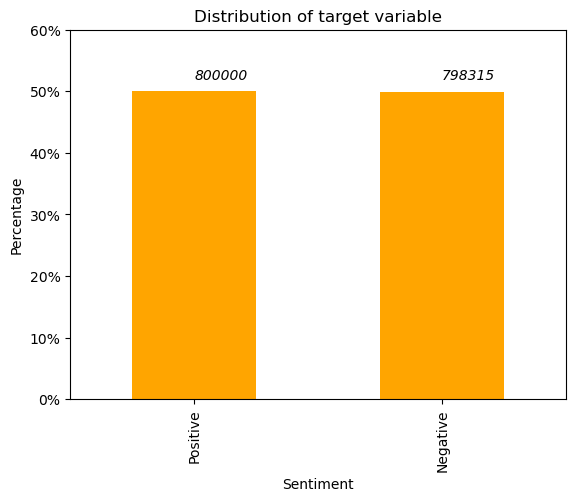

In [32]:
num_positives, num_negatives = df_clean['target'].value_counts()[1], df_clean['target'].value_counts()[0] #number of positve and negative targets
ax = plt.subplot() #axes object
#plot target column using pandas plot funtion
percent = df_clean['target']*100
percent.value_counts(normalize=True).plot(kind='bar', xlabel= 'Sentiment', ylabel='Percentage', ax=ax, color='orange')
#change properties of plot using ax object 
ax.xaxis.set_ticks(ticks=[1,0], labels=['Negative', 'Positive'])
ax.set_ylim(bottom=0, top=0.6)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_title('Distribution of target variable')
ax.text(0, 0.52, f'{num_positives}', style='italic')
ax.text(1, 0.52, f'{num_negatives}', style='italic')
plt.show() #close figure

We can see from the figure above that the number of positives are slightly greater than number of negatives. Both the negatives and positves are around 50% of total number of targets.
This is a good news as both the classes are almost equal in the numbers, we don't have to worry about class imbalance during modelling process.  

### Exploring column `date` <a name="date"></a>

First let's change the datatype of `date` column to timestamp before any exploration. 

In [25]:
date = pd.to_datetime(df_clean['date'])

E:\Machine Learning Engineer\BrainStation\Bootcamp\7.Capstone\capstone_env\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [26]:
min(date), max(date)

(Timestamp('2009-04-06 22:19:45'), Timestamp('2009-06-25 10:28:31'))

The tweets in our dataset are between the dates `April 6, 2009` to `June 25, 2009`. 

In [27]:
df_clean['date'] = date

In [28]:
#sanity check
df_clean['date'].dtype

dtype('<M8[ns]')

Let's explore how does number of tweets vary over time. 

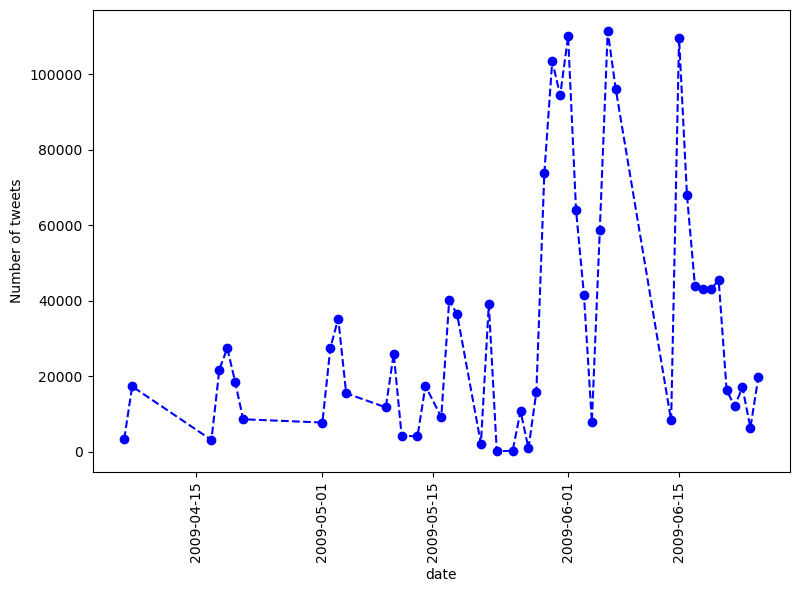

In [29]:
#let's see number of tweets for each day
ax = plt.subplot()
df_clean.groupby(df_clean['date'].dt.date)['text'].count().plot(style='--bo', ylabel='Number of tweets'
                                                               ,rot=90, figsize=(9,6), ax=ax)
ax.set_title('Number of tweets over time')
plt.show()

In [30]:
df_clean.groupby(df_clean['date'].dt.date)['text'].count().sort_values(ascending=False)

date
2009-06-06    111513
2009-06-01    110148
2009-06-15    109654
2009-05-30    103554
2009-06-07     96233
2009-05-31     94432
2009-05-29     73755
2009-06-16     67912
2009-06-02     64115
2009-06-05     58705
2009-06-20     45364
2009-06-17     44012
2009-06-19     43136
2009-06-18     43004
2009-06-03     41532
2009-05-17     40106
2009-05-22     39018
2009-05-18     36415
2009-05-03     35288
2009-04-19     27433
2009-05-02     27402
2009-05-10     25984
2009-04-18     21732
2009-06-25     19694
2009-04-20     18433
2009-05-14     17431
2009-04-07     17289
2009-06-23     17002
2009-06-21     16360
2009-05-28     15885
2009-05-04     15457
2009-06-22     12009
2009-05-09     11732
2009-05-26     10770
2009-05-16      9135
2009-04-21      8579
2009-06-14      8261
2009-06-04      7835
2009-05-01      7708
2009-06-24      6299
2009-05-11      4184
2009-05-13      4063
2009-04-06      3354
2009-04-17      3083
2009-05-21      2128
2009-05-27       839
2009-05-25       169
2009-05-

We can see from the above figure that the number of tweets between `May 29, 2009` and `June 15, 2009` are higher compared to any other period of time. This depends on how data was scrapped by authors. It may be possible that authors scrapped different number of tweets each day. 
<br>

The other possible reason may be that higher number of tweets were tweeted between this time. 

In [31]:
#let's get data for this period of time 
condition1 = pd.Timestamp(year=2009, month=5, day=29)<df_clean['date']
condition2 = df_clean['date']<pd.Timestamp(year=2009, month=6, day=16)
df_clean[condition1 & condition2]

,ids,date,user,text,target
161299,1957266782,2009-05-29 00:00:01,Kikirowr,@_erica I know right,0
161300,1957267208,2009-05-29 00:00:04,AlluringBri,i wish people would leave jon &amp; kate alone...,0
161301,1957267231,2009-05-29 00:00:04,rohan_kini,@roshnimo yup .. sad eh .. Betty man .. it sho...,0
161302,1957267963,2009-05-29 00:00:08,c9xgmr,they shot him he was still alive too...,0
161303,1957268164,2009-05-29 00:00:10,Pinguin98,very very bad headache that is getting worse b...,0
...,...,...,...,...,...
1575631,2189422922,2009-06-15 23:59:57,thepetshopboy,@nancerellababy couple tabs of pure mdma and y...,1
1575632,2189422986,2009-06-15 23:59:58,TenRings,I'm braving the world of Dudley to go to the m...,1
1575633,2189422993,2009-06-15 23:59:58,kelliesimpson,@curligirl \o/ good work day,1
1575634,2189423047,2009-06-15 23:59:58,jasonromero,"@gantzgraf Dude, great minds think alike! My f...",1


In [32]:
df_clean[condition1 & condition2].target.value_counts(normalize=True)

1    0.605443
0    0.394557
Name: target, dtype: float64

If we assume that more number of tweets were tweeted during the above mentioned time, we can see that 60% of tweets have positve sentiment while 40% of tweets have negative sentiment. This can imply two things either people have generally tweet postive things or there was a event during this period of time that made people tweet positively.    

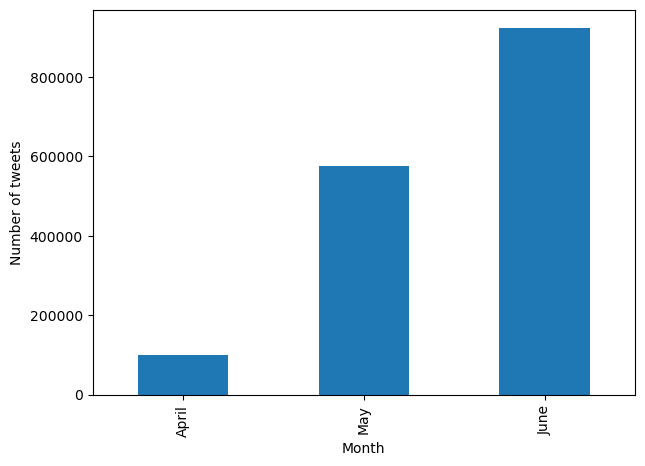

In [33]:
ax = plt.subplot()
df_clean.groupby(df_clean['date'].dt.month)['text'].count().plot(ylabel='Number of tweets', xlabel='Month'
                                                               ,rot=90, figsize=(7, 5), ax=ax,
                                                                kind='bar')
ax.xaxis.set_ticks(ticks=[0, 1, 2], labels=['April', 'May', 'June'])
ax.set_title('Number of tweets over months')
plt.show()

We can see from this figure that number of tweets in the month of June are highest as compare to other months. Let's see how many days for each month there were tweets.    

In [34]:
df_month_day = df_clean.groupby([df_clean['date'].dt.month, df_clean['date'].dt.day])['text'].count()

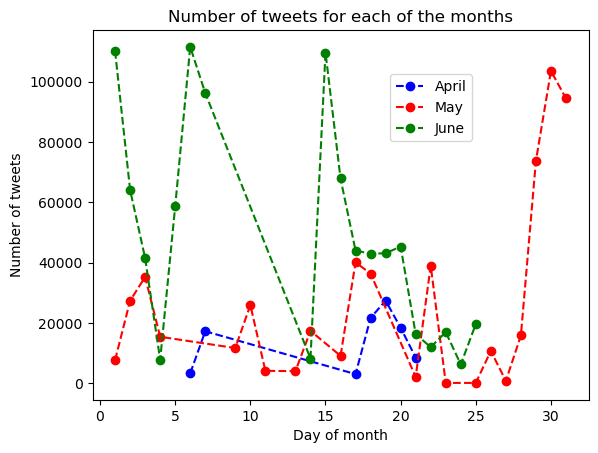

In [35]:
#Plotting number of tweets for each day of month April, May, and June 
plt.figure()
plt.plot(df_month_day.loc[4].index, df_month_day.loc[4].values, '--bo', label='April')
plt.plot(df_month_day.loc[5].index, df_month_day.loc[5].values, '--ro', label='May')
plt.plot(df_month_day.loc[6].index, df_month_day.loc[6].values, '--go', label='June')
plt.legend(loc=(0.6, 0.7))
plt.xlabel('Day of month')
plt.ylabel('Number of tweets')
plt.title('Number of tweets for each of the months')
plt.show()

In [36]:
#number of days for each month
df_month_day.loc[4].values.shape, df_month_day.loc[5].values.shape, df_month_day.loc[6].values.shape

((7,), (22,), (19,))

We can see from the figure above that tweets were scrapped for 7 days in April, 22 days in May, and 19 days in June, respectively. Total number of tweets are highest in the month of June followed by May and April. Although, tweets were scrapped for 19 days in June, the number of tweets are still more than number of tweets for the month of May. In general number of tweets on any given day in the month of June was higher than the months of April and May. 

### Exploring column `user` <a name="user"></a>

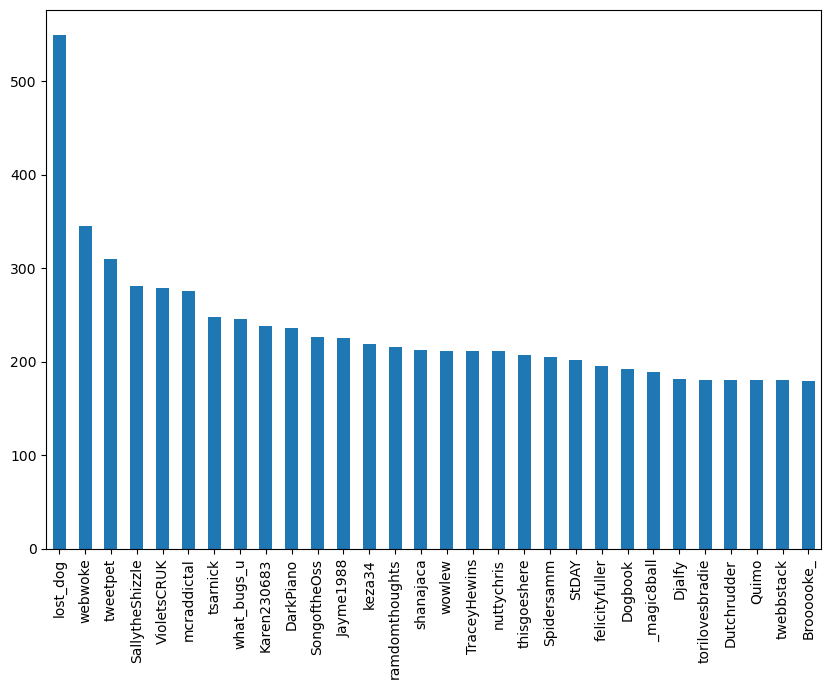

In [37]:
df_clean['user'].value_counts().head(30).plot(kind='bar', figsize=(10,7))
plt.xlabel('Users')
plt.ylabel('Number of tweets')
plt.title('Top twitter users')
plt.show()

The plot above shows number of tweets by a user. Some of the users tweeted more than 100 times over the three months period of time. This signifies how much people use social media. 

In [38]:
with pd.option_context('display.max_colwidth', None): #using with to temporarily set column with for dataframe to maximum
    display(df_clean[df_clean['user']=='lost_dog']['text'].head(1))

43935    @NyleW I am lost. Please help me find a good home. 
Name: text, dtype: object

In [39]:
df_clean[df_clean['user']=='webwoke']

,ids,date,user,text,target
363303,2047801265,2009-06-05 14:12:05,webwoke,"auchh, drop by 1 (32)elitestv.com",0
366529,2048883634,2009-06-05 15:56:07,webwoke,"auchh, drop by 1 (7)pedeee.com",0
366530,2048883882,2009-06-05 15:56:08,webwoke,"auchh, drop by 1 (17)rumahabi.com",0
366597,2048903368,2009-06-05 15:58:07,webwoke,"auchh, drop by 1 (18)twitter.com",0
366599,2048903446,2009-06-05 15:58:07,webwoke,"auchh, drop by 1 (19)yehia.org",0
...,...,...,...,...,...
1505838,2072460652,2009-06-07 21:04:09,webwoke,ohh yesss move up by 3 99. mybloglog.com,1
1505841,2072460726,2009-06-07 21:04:09,webwoke,Gooo... move up by 3 100. digg.com,1
1506014,2072494733,2009-06-07 21:08:09,webwoke,GoGoGo... move up by 2 105. ardhindie.com,1
1506015,2072494818,2009-06-07 21:08:09,webwoke,uhuiii... move up by 2 106. seo-guy.com,1


The figure above shows top thirty users who tweeted most. User `lost_dog` had the highest number of tweets compared to other tweeters. Looking at this user's tweets, it seems all the tweets are same and about `I am lost. Please help me find a good home.`. All the tweets are same but the user tweeted it multiple times by tagging different users. This shows that we may have to remove the users from text to remove duplicated text from `text` column.  

### Exploring column `text` <a name="text"></a>

In [40]:
#display whole text in the text column 
with pd.option_context('display.max_colwidth', None):
    display(df_clean[['text', 'target']].head(40))

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",0
8,@Tatiana_K nope they didn't have it,0
9,@twittera que me muera ?,0


From initial visual inspection, we can see that the `text` column contains links, and user names in addition to text. We have to remove user name and links from the `text` column as they do not provide any additional information about sentiment of the tweet. 

In [41]:
user_link = r"@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9\s]+"   

`@\S+` matches `@` symbol and any number of non-whitespace character. `\S+` is equivalent to the class   

`\[^ \t\n\r\f\v]+`.     

<br>

`|https?:\S+|` : This matches `http` part literally. `s?` matches s 0 or 1 time. `\S+` matches any number of non_white space characters. 

<br>

`|[^A-Za-z0-9\s]+` : This part gets rid of any number of non-alphanumeric characters. 

<br>

This code was edited from this [notebook](https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis) on kaggle. 

Let's apply this to our text in the dataframe 



In [42]:
df_clean['text'] = df_clean.text.str.replace(user_link, '')

C:\Users\SHARM~1.LAP\AppData\Local\Temp/ipykernel_14136/3569007833.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['text'] = df_clean.text.str.replace(user_link, '')


In [43]:
#display whole text in the text column to see if we got rid from link and users in the text
with pd.option_context('display.max_colwidth', None):
    display(df_clean[['text', 'target']].sample(40))

,text,target
1083760,butt facedwhat else is new hahahah,1
566620,noo you cant go to disneyland wout me,0
864927,weve had 44 votes in the photo contest a record youre very popular,1
533002,hey im back and not back maybe my internets off missed ya,0
278337,Ok today is officially moving day Wish me luck and i hope I can find Lexi a home,0
722550,my feet hurt,0
461436,I will Its not lookin good tho He whats your end of July lookin like,0
1508063,ooooh inpiration bunnyi like thatand sexy back loves me too he wants to build on us,1
988399,Shower time one hour till math exam Arghhh X x,1
105060,omg sad how did you manage that,0


We can see that links and user names are gone from the data but we see some empty string in the data after removing user names and links. Let's check for number of these empty strings in our data. but first check if there wer null values create due to data cleaning. 

In [44]:
#there are no null values in data after cleaning
df_clean.isna().any(axis=1).sum()

0

Some of the cells in data only contained user name and link. These cells contained only empty white spaces when user name and links were removed from text. To get rid from the whitespace, following text processing was carried out:
- First remove the whitespace which occur more than one time 
- Then remove the white spaces at the beginning and end of the string using strip() function. 

In [45]:
#remove empty strings from data
df_clean['text'] = df_clean['text'].str.split().apply(lambda x: ' '.join(x)).str.strip()

In [46]:
df_clean['text'] = df_clean['text'].str.strip()

After removing all the white spaces from text, let's have a look at empty cells in the text column of our data set.   

In [47]:
df_clean[df_clean['text']=='']

,ids,date,user,text,target
208,1467863072,2009-04-06 22:33:25,Artiel87,,0
249,1467874569,2009-04-06 22:36:27,Artiel87,,0
282,1467881474,2009-04-06 22:38:20,__Susan__,,0
398,1467912842,2009-04-06 22:46:53,KimberlyKane,,0
430,1467919452,2009-04-06 22:48:48,jtmal0723,,0
...,...,...,...,...,...
1597326,2192910190,2009-06-16 07:43:42,senoritaperdida,,1
1597684,2192984835,2009-06-16 07:50:07,upontheshelf,,1
1598192,2193121024,2009-06-16 08:01:33,habibsaher,,1
1599494,2193453573,2009-06-16 08:28:48,RobNice24,,1


We can see that there are 3562 rows in our dataframe where the values in text column are empty strings. I am dropping these rows from the dataframe. These empty cells will not contribute in predicting sentiment of the tweet, therefore, I am deleting these cells from the data. 

In [48]:
index = df_clean[df_clean['text']==''].index
df_clean.drop(index=index, inplace=True)

In [49]:
df_clean.shape[0] + len(index) == 1598315

True

Now let's check if there are duplicate values in text column due to removal of users and links. 

In [50]:
df_clean[df_clean['text'].duplicated()]

,ids,date,user,text,target
625,1467968979,2009-04-06 23:02:45,atothebed,APRIL 9TH ISNT COMING SOON ENOUGH,0
1377,1468140312,2009-04-06 23:56:10,needsex,I think I need to get laid Sad revolution I ha...,0
1537,1468174365,2009-04-07 00:07:09,supclayyy,really now time for sleep dreaming of my city ...,0
1544,1468176438,2009-04-07 00:07:49,isdown,Wondering why gamebattles is down,0
1690,1468210813,2009-04-07 00:19:09,mcsteph94,hey saw u guys play pushoverdidnt get 2 meet u...,0
...,...,...,...,...,...
1599883,2193553992,2009-06-16 08:36:54,BeckandHersey,bring on summer,1
1599907,2193575210,2009-06-16 08:38:39,themunny,morning,1
1599914,2193575571,2009-06-16 08:38:41,BeBo_Evilbunny,Back,1
1599967,2193578138,2009-06-16 08:38:54,paligurl93,checking my mail,1


We can see that there are approximately 62,000 duplicate rows in the data. Let's have a look at these duplicated rows in our data. 

In [51]:
df_clean[df_clean['text'].duplicated(keep=False)]['text'].sort_values().head(20)

40850               008 Restaurant on the moon no atmosphere
90277               008 Restaurant on the moon no atmosphere
193650              008 Restaurant on the moon no atmosphere
150467              008 Restaurant on the moon no atmosphere
60796               008 Restaurant on the moon no atmosphere
299046              008 Restaurant on the moon no atmosphere
1056181                                                    1
598459                                                     1
892706                                                     1
802546                                                     1
1094141                                                    1
1319193                                                    1
778968                                                     1
749672                 1 exam donewent ok headacheMASSIVE OW
400382                 1 exam donewent ok headacheMASSIVE OW
482840                                   1 exam down 4 to go
1315542                 

I am dropping these duplicate values from the dataframe. One additional thing to see here is digits in data. We have to remove these digits as they don't contribute to sentiment of tweet. 

In [52]:
df_clean.drop_duplicates(subset='text', inplace=True)

In [53]:
#sanity check 
df_clean.shape[0] + 61991 == 1594753

True

We can see that the dulicated rows have been deleted from the dataset.

Let's see if cleaning process created rows with only digits in the text column. 

In [54]:
df_clean[df_clean['text'].str.isdigit()]

,ids,date,user,text,target
139208,1880751526,2009-05-22 02:22:19,lazytosha,4,0
147082,1882666652,2009-05-22 07:16:37,en0x,24,0
173099,1963875923,2009-05-29 13:23:03,dreamkeeper,100,0
265714,1988850006,2009-05-31 23:33:27,pennamico,20,0
271721,1990070133,2009-06-01 03:46:54,ekozlov,3,0
327006,2008906142,2009-06-02 14:50:38,ferrozer,27,0
340525,2014858970,2009-06-03 02:55:28,swined,4222,0
340537,2014860275,2009-06-03 02:55:43,kINder_kaluga,1355,0
359959,2046142848,2009-06-05 11:45:15,lewellyn,404,0
484886,2180948222,2009-06-15 11:09:33,kennyshakir,59,0


There are 58 rows for which the value of text is a digit. I am dropping these rows as the digits by themselves do not carry any sentiment with them. 

In [55]:
df_clean.drop(index=df_clean[df_clean['text'].str.isdigit()].index, inplace=True)

In [56]:
#sanity check 
df_clean.shape[0] + 58 == 1532762

True

Finally, let's once more check the distribution of our target data to make sure that it make sense after data cleaning. 

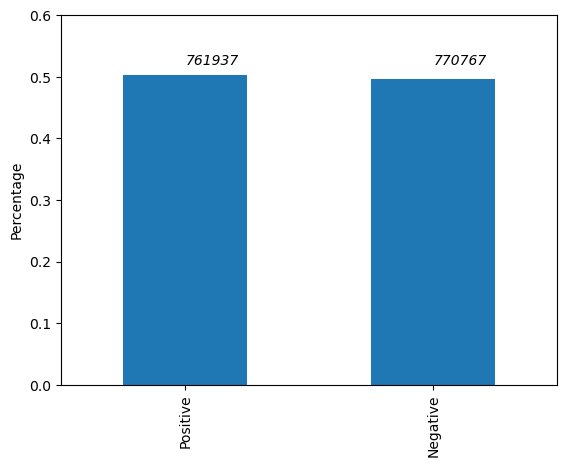

In [57]:
num_positives, num_negatives = df_clean['target'].value_counts()[1], df_clean['target'].value_counts()[0] #number of positve and negative targets
ax = plt.subplot() #axes object
#plot target column using pandas plot funtion
df_clean['target'].value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', ax=ax)
#change properties of plot using ax object 
ax.xaxis.set_ticks(ticks=[1,0], labels=['Negative', 'Positive'])
ax.set_ylim(bottom=0, top=0.6)
ax.set_title('Target distribution')
ax.text(0, 0.52, f'{num_positives}', style='italic')
ax.text(1, 0.52, f'{num_negatives}', style='italic')
plt.show() #close figure

The distribution of target varibale looks balanced after cleaning the data. Now let's export the cleaned data so that we can use it for modelling later. 

In [59]:
#export cleaned data 
df_clean.to_csv('../data/cleaned_data.csv')

### Conclusion  <a name="conclusion"></a>    

In this notebook, we described the process data collection for modelling and testing the develope models. Basic business questions were descried and quality and completeness of data was discussed.    

After discussing the dataset, we dived into data preprocessing and EDA. Number of steps were taken to clean the data such as text processing to remove links and user names to name a few. Each column in the dataset was explored individually to catch interesting patterns. 

Now we have cleaned text data that can be transformed to fed into machine learning and deep learning models.     

In notebook 2, we will dive into modelling our text data to predict sentiment.   